In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('../Data.csv')
data = data[['RecoDatapT','RecoDataeta','RecoDataphi','RecoDatam']]
data.head()

,RecoDatapT,RecoDataeta,RecoDataphi,RecoDatam
0,40.3892,3.41479,1.47023,12.53740
1,40.3892,3.41479,1.47023,12.53740
2,29.3586,-1.17862,1.84039,9.95503
3,20.9593,2.13374,-2.86886,9.55921
4,35.2909,2.96499,1.36464,10.69580


In [8]:
data.columns = ['realpT','realera','realphi','realm']
data.head()

,realpT,realera,realphi,realm
0,40.3892,3.41479,1.47023,12.53740
1,40.3892,3.41479,1.47023,12.53740
2,29.3586,-1.17862,1.84039,9.95503
3,20.9593,2.13374,-2.86886,9.55921
4,35.2909,2.96499,1.36464,10.69580


In [18]:
data.shape

(100000, 4)

In [6]:
predicted_pt=pd.read_csv('../predicted_data/RecoDatapT_predicted.csv')['RecoDatapT_predicted']
predicted_eta=pd.read_csv('../predicted_data/RecoDataeta_predicted.csv')['RecoDataeta_predicted']
predicted_phi=pd.read_csv('../predicted_data/RecoDataphi_predicted.csv')['RecoDataphi_predicted']
predicted_m=pd.read_csv('../predicted_data/RecoDatam_predicted.csv')['RecoDatam_predicted']
predicted=pd.concat([predicted_pt, predicted_eta, predicted_phi, predicted_m],axis=1)
predicted.columns=['predicted_pT','predicted_eta','predicted_phi','predicted_m']
predicted.head()

,predicted_pT,predicted_eta,predicted_phi,predicted_m
0,22.128952,1.695410,-2.210394,8.398450
1,25.404654,-1.724494,-1.800443,7.713258
2,29.596598,0.248178,1.637787,8.679240
3,21.536783,-0.568101,-2.724383,6.020657
4,42.282650,-0.151822,-1.142960,7.665214


In [17]:
predicted.shape

(20000, 4)

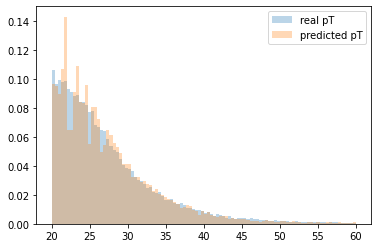

In [22]:
# fig, ax = plt.subplots(1,4, figsize=(10,10))
# ax = ax.flatten()
range_pt=(20,60)
plt.hist(data['realpT'],bins=100,label='real pT',alpha=0.3,density=True,range=range_pt)
plt.hist(predicted['predicted_pT'],bins=100,label='predicted pT',alpha=0.3,density=True,range=range_pt)
plt.legend()

In [25]:
from scipy.special import rel_entr
KLD = rel_entr(data['realpT'][:20000],predicted['predicted_pT'])
print('KL= ',sum(KLD))

KL=  37881.05159382759


In [26]:
KLD = rel_entr(predicted['predicted_pT'],data['realpT'][:20000])
print('KL= ',sum(KLD))

KL=  30578.59136264614


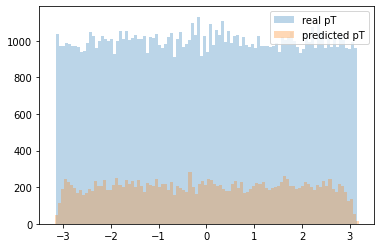

In [16]:
plt.hist(data['realphi'],bins=100,label='real pT',alpha=0.3)
plt.hist(predicted['predicted_phi'],bins=100,label='predicted pT',alpha=0.3)
plt.legend()